In [44]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import matplotlib.ticker as mticker

# banco de dados
db = "D:/monografia/_dva/db/dva.db"
conn = sqlite3.connect(db)
# conn.close()
query = """
SELECT 
    ANO,
    SUM(Pessoal) * 0.000001 as Pessoal,
    SUM(Governo) * 0.000001 as Governo,
    SUM(RCT) * 0.000001 as Credores,
    SUM(RCP) * 0.000001 as Acionistas
FROM dva_igpdi
GROUP BY ANO;


"""
dados = pd.read_sql_query(query, conn)
dados.head()


,ANO,Pessoal,Governo,Credores,Acionistas
0,2009,374.198928,845.788591,266.455216,441.319747
1,2010,425.979366,879.931219,300.042702,497.967569
2,2011,451.484486,846.001163,385.892500,462.788246
3,2012,460.960890,758.209230,359.051998,269.299143
4,2013,452.684229,716.954328,395.743747,179.281843


In [45]:
df = pd.DataFrame(dados)

# Preparar dados para o gráfico
anos = df["ANO"]
pessoal = df["Pessoal"]
governo = df["Governo"]
credores = df["Credores"]
acionistas = df["Acionistas"]
df.head()

,ANO,Pessoal,Governo,Credores,Acionistas
0,2009,374.198928,845.788591,266.455216,441.319747
1,2010,425.979366,879.931219,300.042702,497.967569
2,2011,451.484486,846.001163,385.892500,462.788246
3,2012,460.960890,758.209230,359.051998,269.299143
4,2013,452.684229,716.954328,395.743747,179.281843


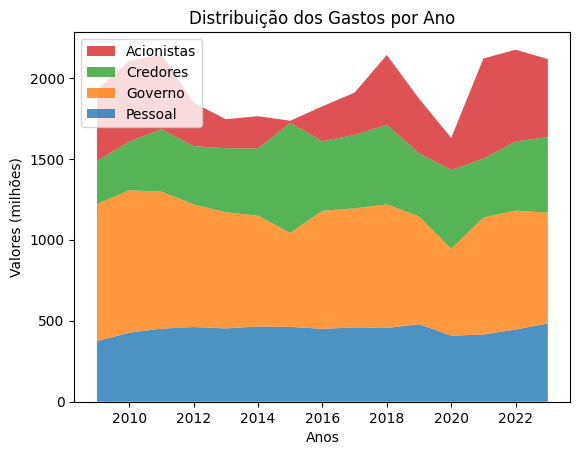

In [46]:
# Criar gráfico de área empilhada
fig, ax = plt.subplots()
ax.stackplot(anos, pessoal, governo, credores, acionistas,
             labels=["Pessoal", "Governo", "Credores", "Acionistas"], alpha=0.8)
ax.legend(loc='upper left', reverse=True)
ax.set_title('Distribuição dos Gastos por Ano')
ax.set_xlabel('Anos')
ax.set_ylabel('Valores (milhões)')

# Ajustar os ticks menores
# Ajustar o MultipleLocator para refletir melhor a escala dos dados em milhões
ax.yaxis.set_minor_locator(mticker.MultipleLocator(1000000))  # Ticks menores a cada 1000 milhões (ou 1 bilhão)

# Exibir gráfico
plt.show()

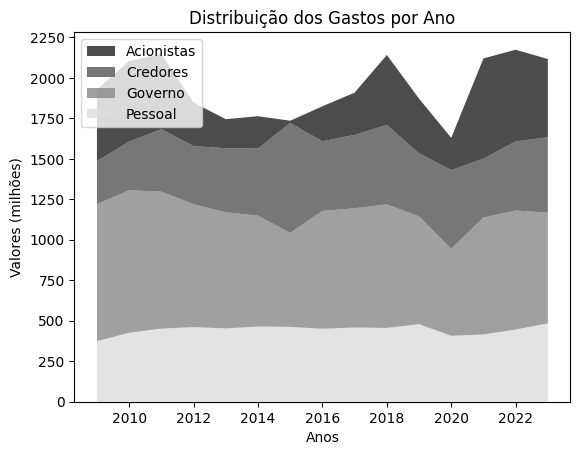

In [48]:
fig, ax = plt.subplots()
ax.stackplot(anos, pessoal, governo, credores, acionistas,
             labels=["Pessoal", "Governo", "Credores", "Acionistas"], 
             colors=['#ddd', '#888', '#555', '#1f1f1f'], alpha=0.8)
ax.legend(loc='upper left', reverse=True, frameon=True)
ax.set_title('Distribuição dos Gastos por Ano', color='#000')
ax.set_xlabel('Anos', color='#000')
ax.set_ylabel('Valores (milhões)', color='#000')

# Ajustar os ticks menores
ax.yaxis.set_minor_locator(mticker.MultipleLocator(1000000000))  # Ticks menores a cada 1000 milhões (ou 1 bilhão)

# Ajustar ticks principais e menores para escala de cinza
ax.tick_params(axis='both', colors='#000')
ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax.yaxis.set_minor_locator(mticker.MultipleLocator(1000000000))  # Ajustar o MultipleLocator para refletir melhor a escala dos dados em milhões

# Ajustar o fundo da figura e dos eixos
fig.patch.set_facecolor('#ffffff')  # Cor de fundo da figura
ax.set_facecolor('#fff')  # Cor de fundo dos eixos

# Exibir gráfico
plt.show()